In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx

def visualize_neural_network(json_data):
    """
    Visualizes neural networks described in the given JSON data.
    
    Parameters:
    -----------
    json_data : dict or str
        Either a dictionary containing the network data or a string with the file path to a JSON file.
    
    Returns:
    --------
    None
        Displays the visualization using matplotlib.
    
    Example:
    --------
    # From dictionary
    network_data = {
        "genomes": [
            {
                "Id": 1,
                "NodeGenes": [
                    {"Id": 1, "Type": 0},
                    {"Id": 2, "Type": 0},
                    {"Id": 3, "Type": 2},
                    {"Id": 4, "Type": 1}
                ],
                "ConnectionGenes": [
                    {"Connection": {"Input": 1, "Output": 3}, "Weight": 0.0, "Status": 1, "Innovation": 1},
                    {"Connection": {"Input": 2, "Output": 3}, "Weight": 0.0, "Status": 0, "Innovation": 2},
                    {"Connection": {"Input": 1, "Output": 4}, "Weight": 1.0, "Status": 0, "Innovation": 3},
                    {"Connection": {"Input": 4, "Output": 3}, "Weight": 0.0, "Status": 0, "Innovation": 4}
                ],
                "Fitness": 0.0
            }
        ]
    }
    visualize_neural_network(network_data)
    
    # Or from file
    visualize_neural_network("path/to/network.json")
    """
    # If a string is provided, treat it as a file path
    if isinstance(json_data, str):
        try:
            with open(json_data, 'r') as file:
                json_data = json.load(file)
        except Exception as e:
            print(f"Error reading JSON file: {e}")
            return
    
    # Extract the genomes
    genomes = json_data.get("genomes", [])
    
    for i, genome in enumerate(genomes):
        # Create a directed graph
        G = nx.DiGraph()
        
        # Node type mapping
        node_types = {0: "input", 1: "hidden", 2: "output"}
        node_colors = {"input": "lightblue", "output": "lightgreen", "hidden": "salmon"}
        
        # Add nodes
        nodes = genome.get("NodeGenes", [])
        for node in nodes:
            node_id = node.get("Id")
            node_type = node.get("Type")
            node_type_name = node_types.get(node_type, "unknown")
            G.add_node(node_id, type=node_type_name)
        
        # Add connections
        connections = genome.get("ConnectionGenes", [])
        for conn in connections:
            conn_data = conn.get("Connection", {})
            input_id = conn_data.get("Input")
            output_id = conn_data.get("Output")
            weight = conn.get("Weight", 0.0)
            status = conn.get("Status", 0)  # 0 is enabled, 1 is disabled
            
            # Only add edge if both nodes exist
            if input_id in G.nodes and output_id in G.nodes:
                # Add the edge with attributes
                G.add_edge(
                    input_id, 
                    output_id, 
                    weight=weight, 
                    enabled=(status == 0),
                    innovation=conn.get("Innovation")
                )
        
        # Create the visualization
        plt.figure(figsize=(10, 8), num=f"Genome {i+1} - Fitness: {genome.get('Fitness', 0.0)}")
        
        # Create position layout
        # Organize nodes by type: inputs on left, outputs on right, hidden in middle
        pos = {}
        inputs = [n for n, d in G.nodes(data=True) if d.get('type') == 'input']
        outputs = [n for n, d in G.nodes(data=True) if d.get('type') == 'output']
        hidden = [n for n, d in G.nodes(data=True) if d.get('type') == 'hidden']
        
        # Calculate y positions
        input_y_step = 1.0 / max(1, len(inputs))
        output_y_step = 1.0 / max(1, len(outputs))
        hidden_y_step = 1.0 / max(1, len(hidden))
        
        # Assign positions
        for i, node in enumerate(inputs):
            pos[node] = (0, 1 - i * input_y_step - input_y_step/2)
        
        for i, node in enumerate(hidden):
            pos[node] = (0.5, 1 - i * hidden_y_step - hidden_y_step/2)
        
        for i, node in enumerate(outputs):
            pos[node] = (1, 1 - i * output_y_step - output_y_step/2)
            
        # Draw nodes
        for node_type, color in node_colors.items():
            nodelist = [n for n, d in G.nodes(data=True) if d.get('type') == node_type]
            nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_color=color, node_size=700)
        
        # Draw edges
        # Enabled connections
        enabled_edges = [(u, v) for u, v, d in G.edges(data=True) if d.get('enabled', True)]
        nx.draw_networkx_edges(G, pos, edgelist=enabled_edges, width=2)
        
        # Disabled connections
        disabled_edges = [(u, v) for u, v, d in G.edges(data=True) if not d.get('enabled', True)]
        nx.draw_networkx_edges(G, pos, edgelist=disabled_edges, width=1, style='dashed', alpha=0.5)
        
        # Add edge labels (weights)
        edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
        
        # Add node labels
        node_labels = {n: f"{n}\n({d['type']})" for n, d in G.nodes(data=True)}
        nx.draw_networkx_labels(G, pos, labels=node_labels)
        
        plt.title(f"Genome {genome.get('Id')} - Fitness: {genome.get('Fitness', 0.0)}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

C:\Users\St0pien\AppData\Local\Temp\ipykernel_19656\2915474988.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8), num=f"Genome {i+1} - Fitness: {genome.get('Fitness', 0.0)}")


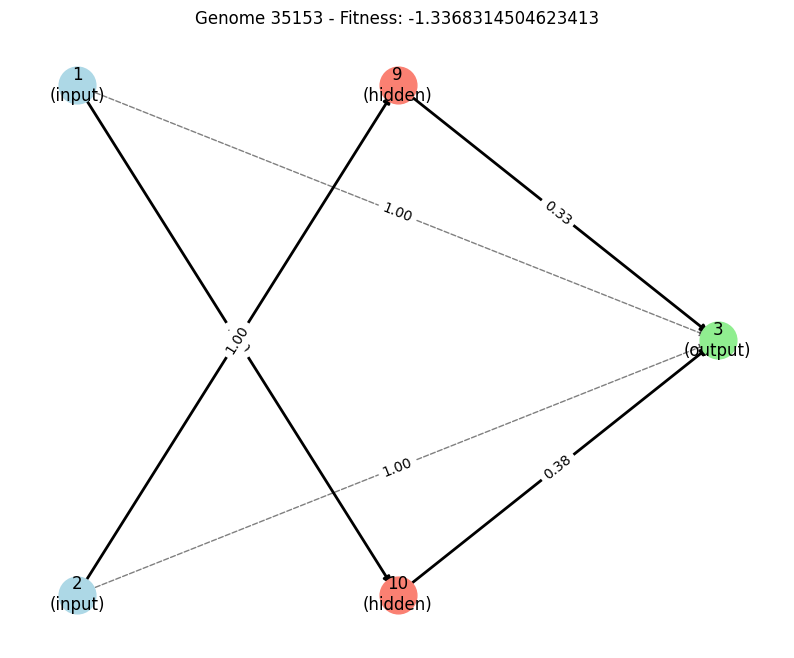

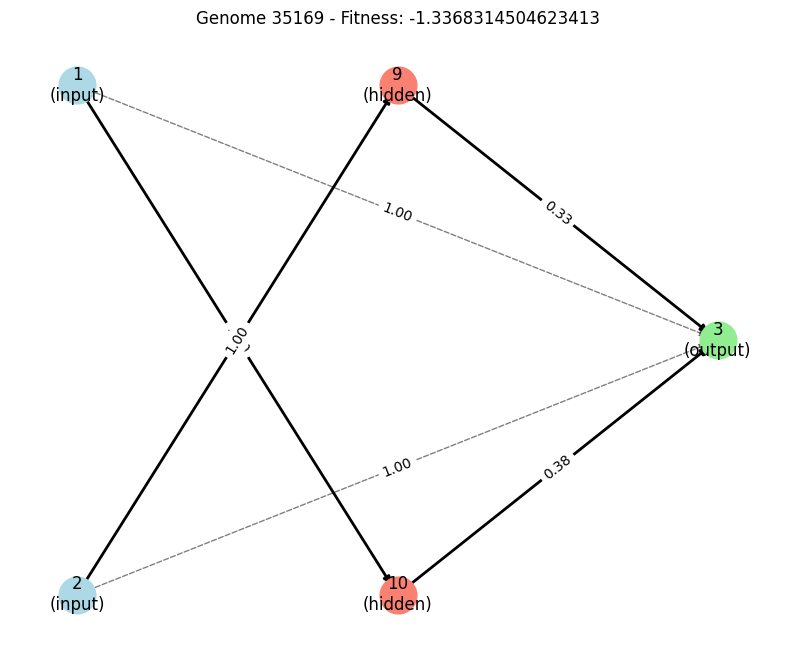

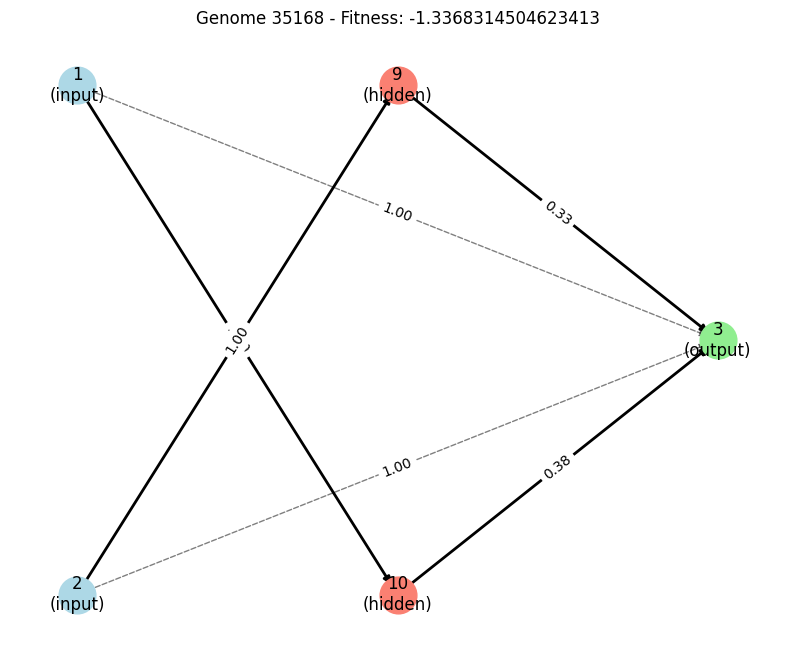

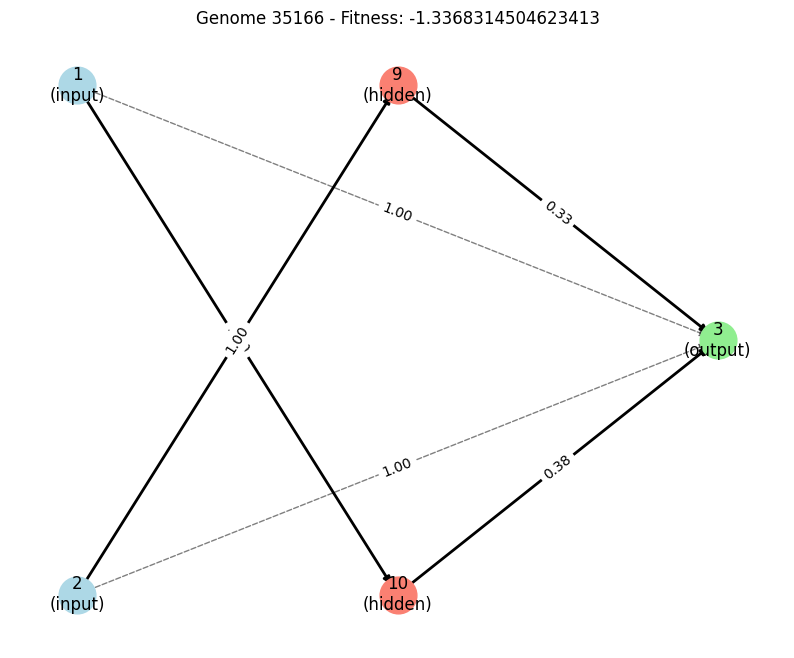

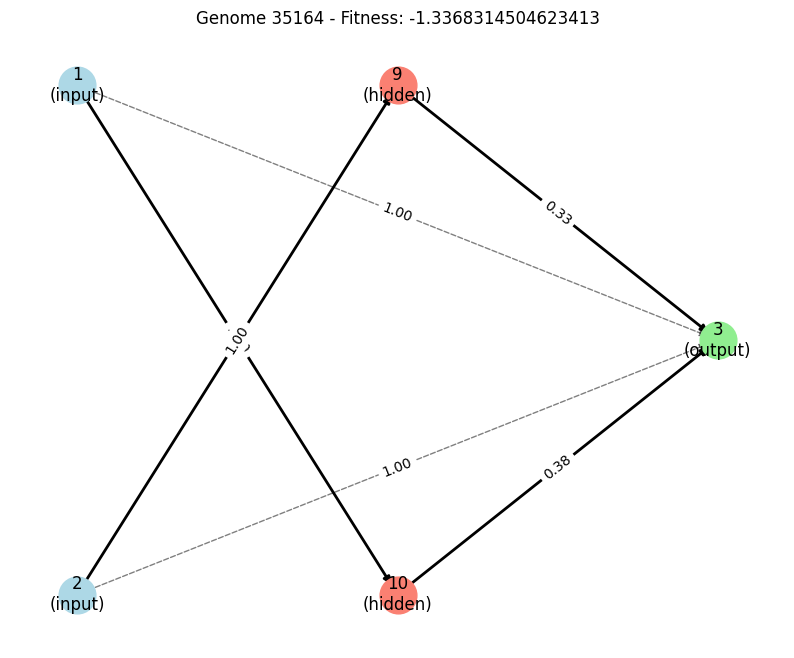

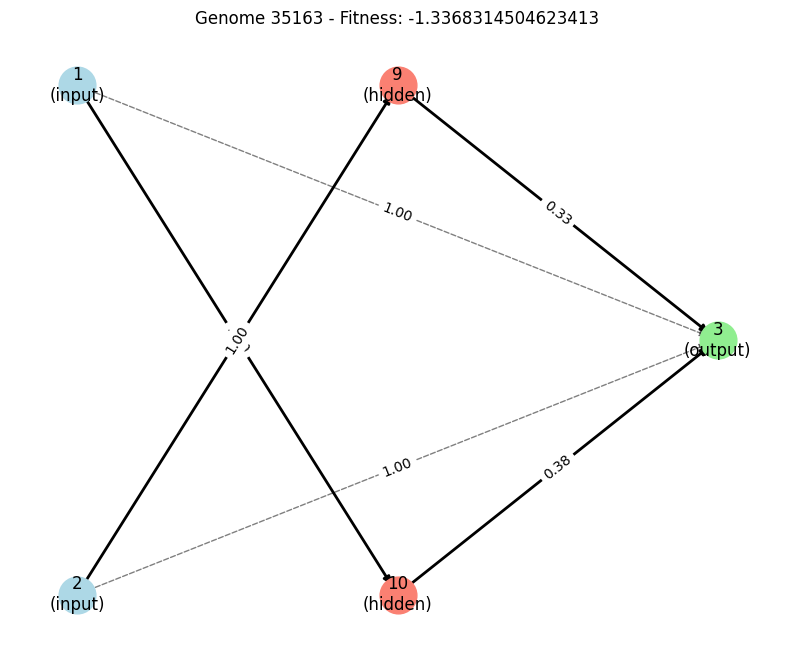

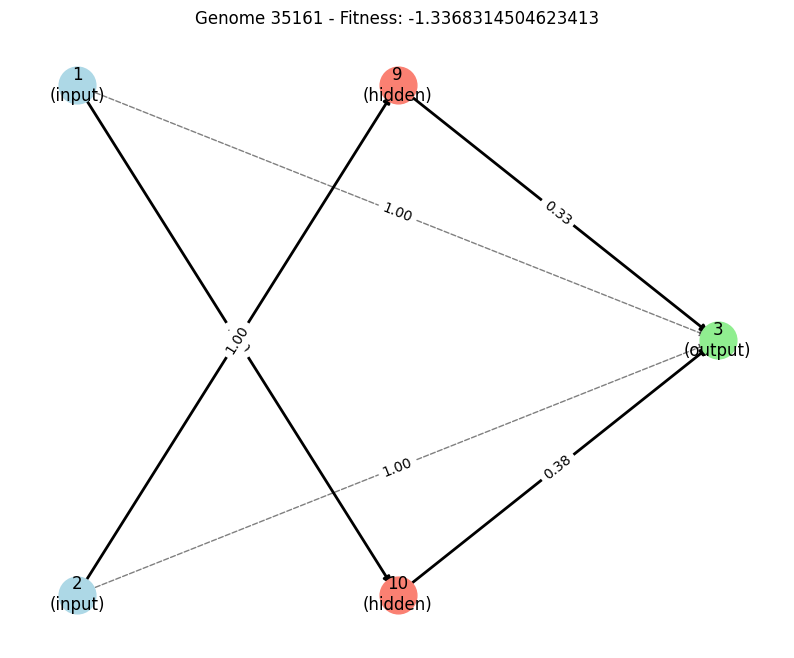

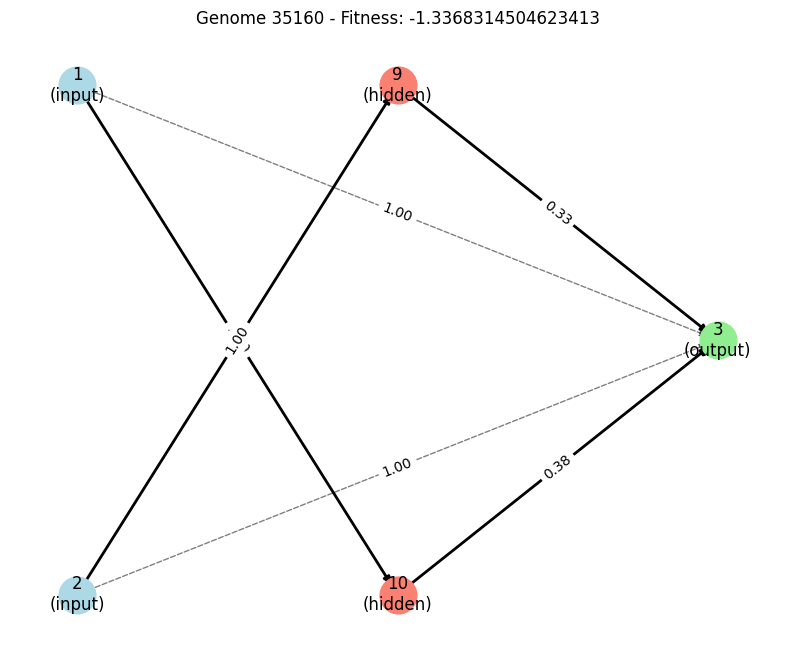

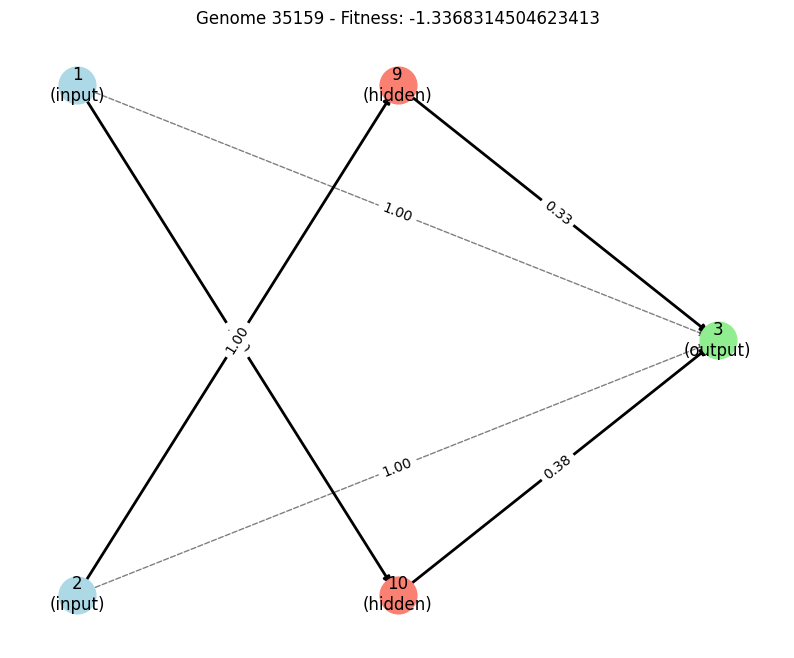

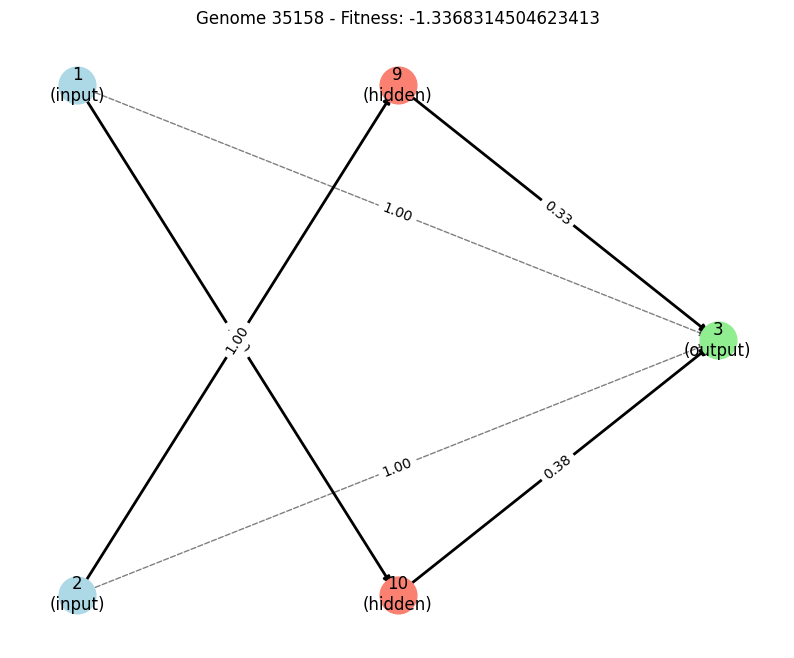

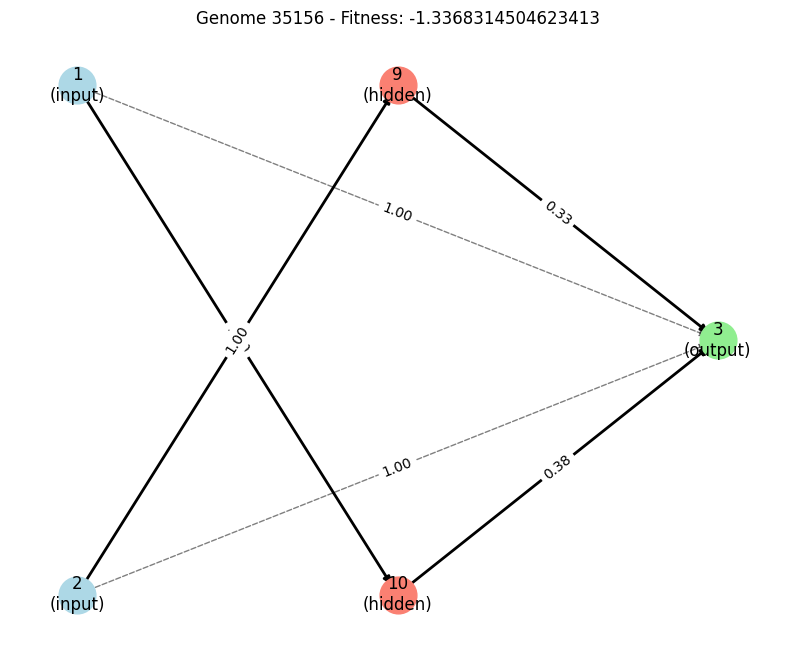

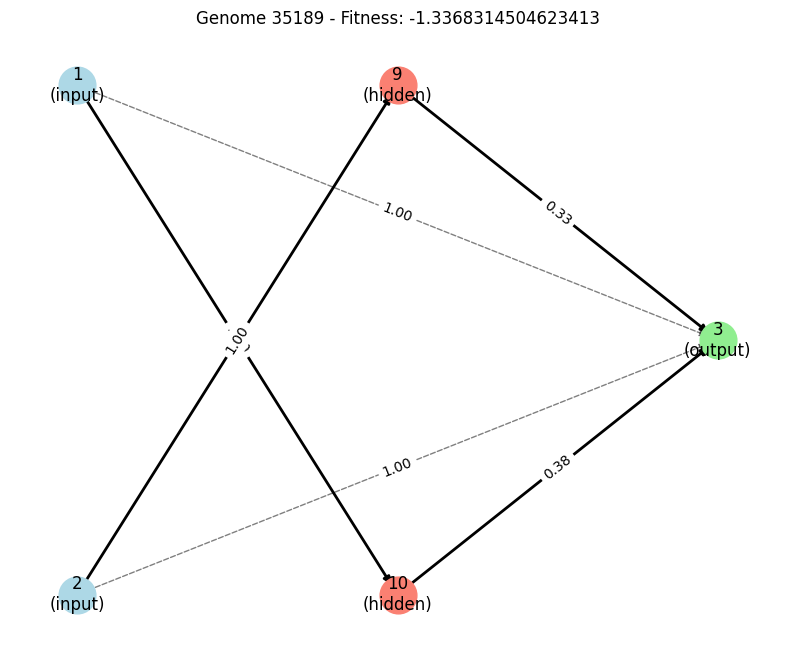

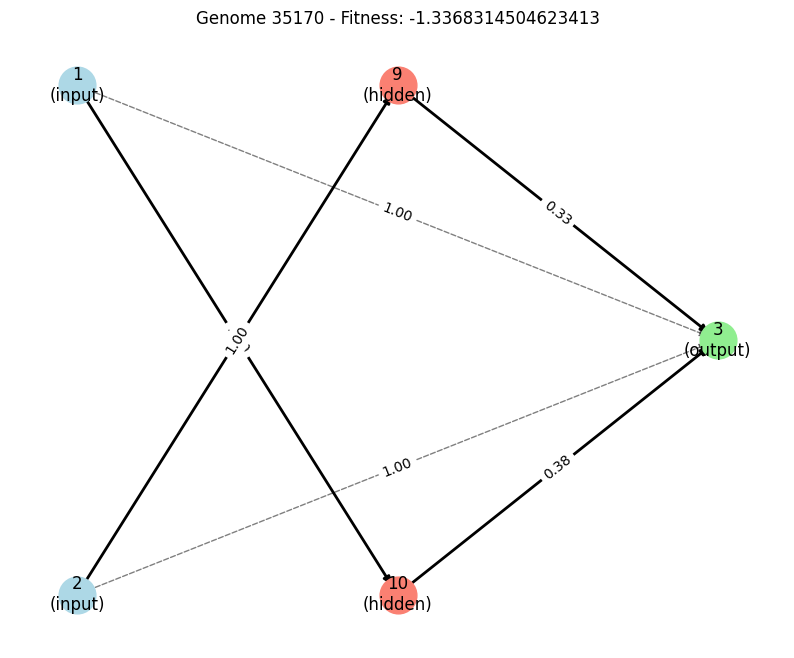

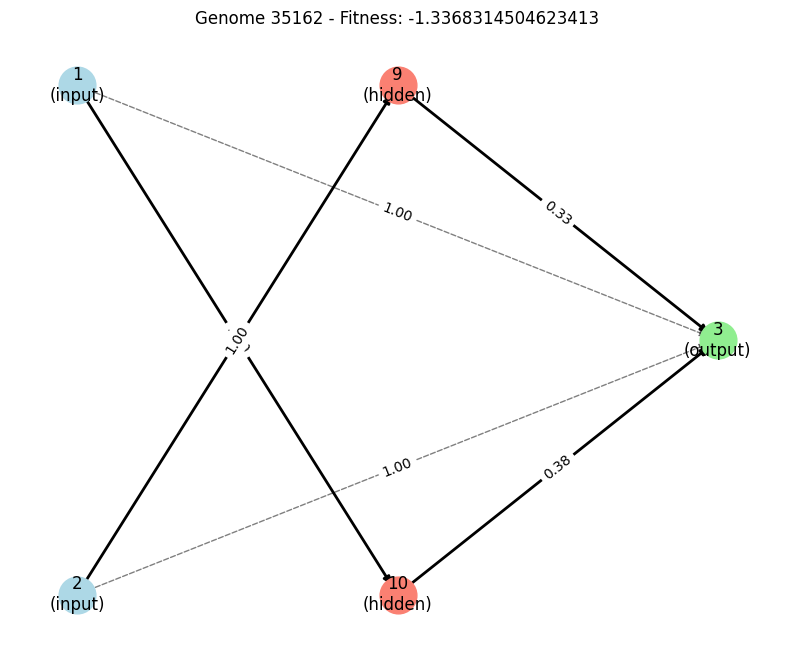

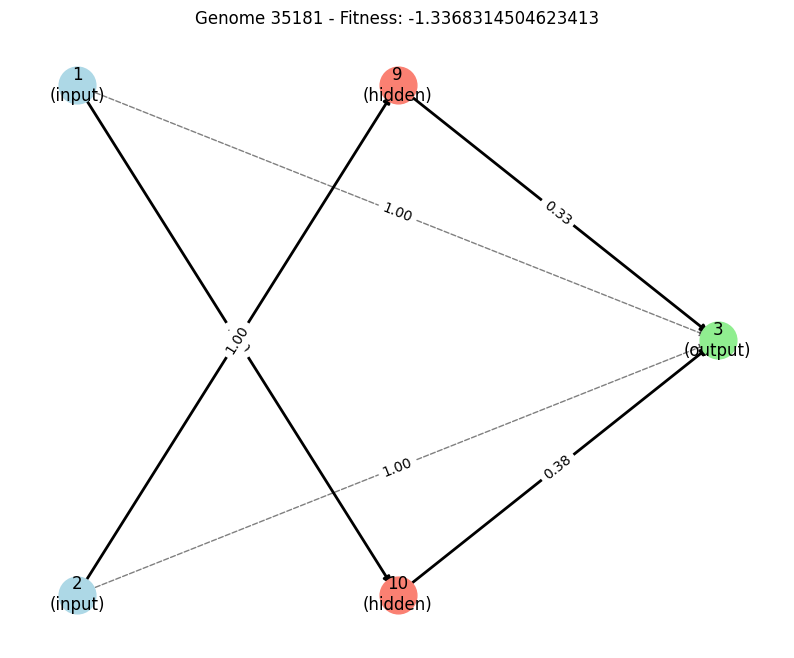

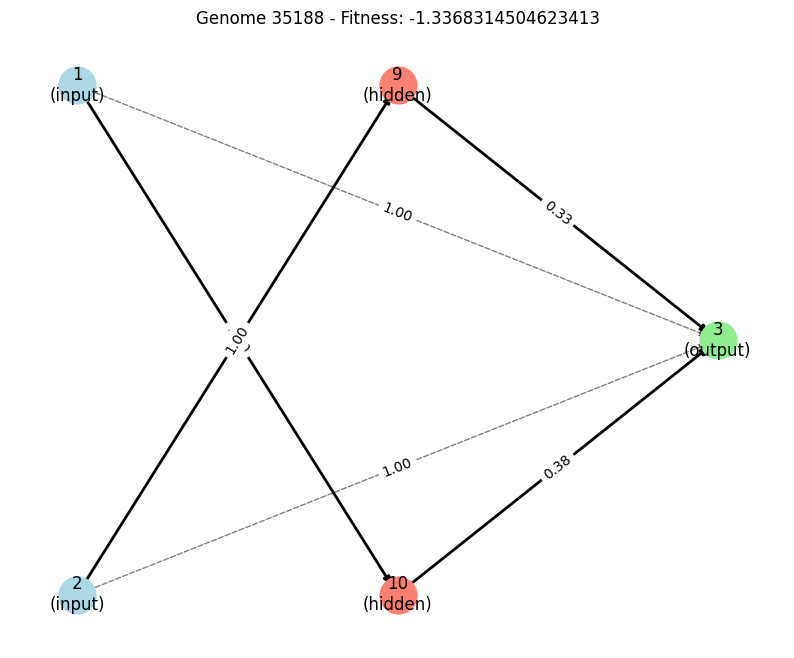

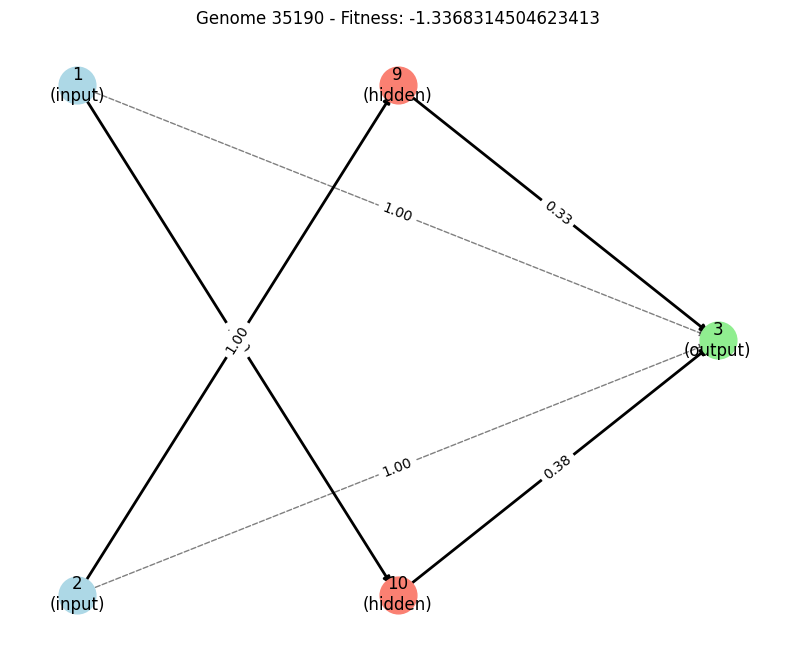

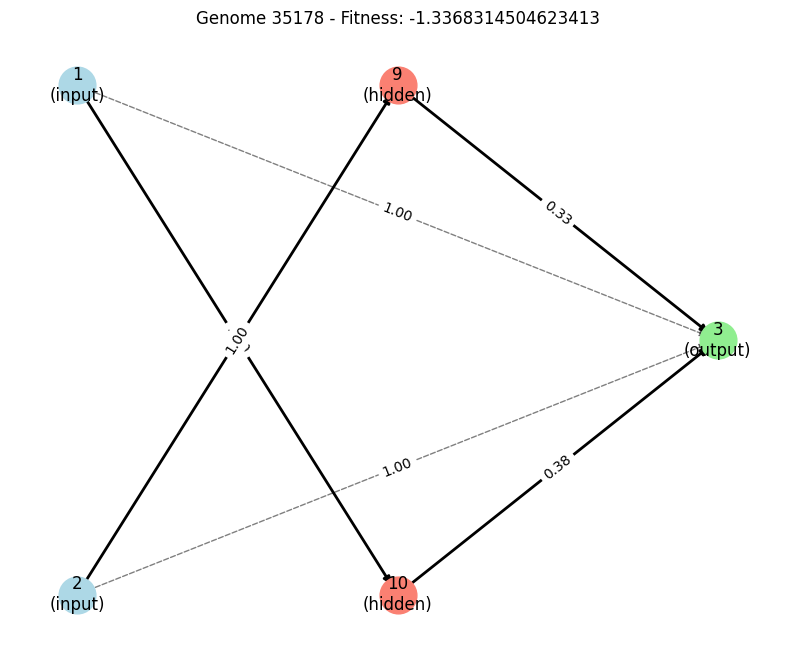

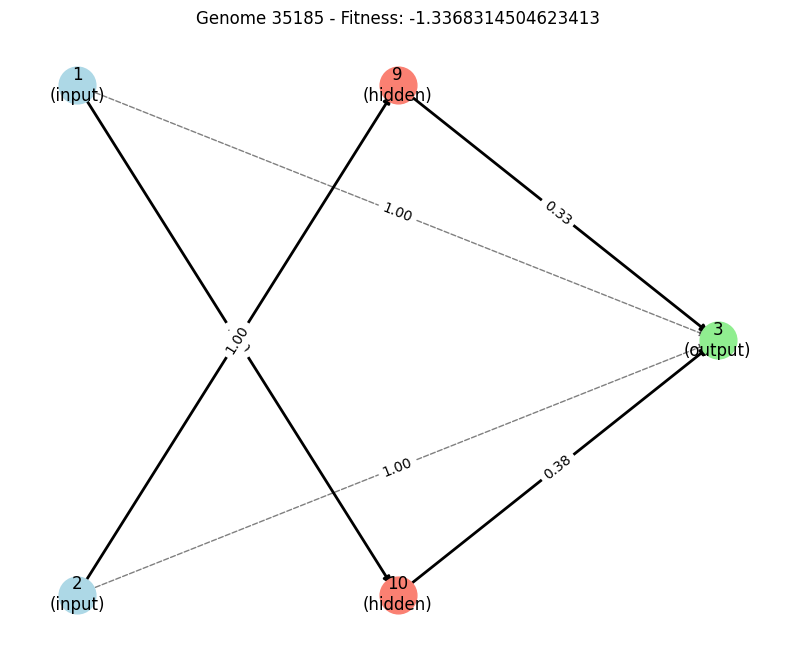

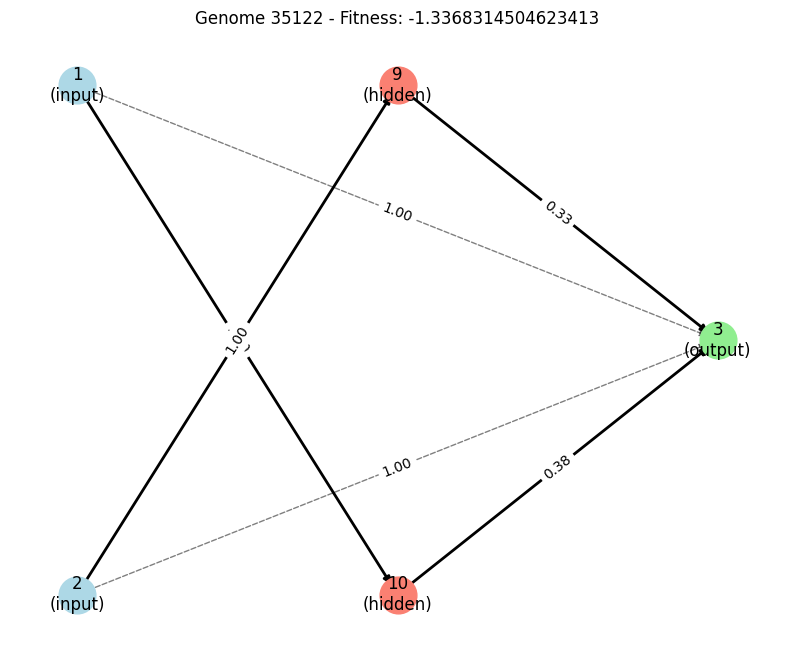

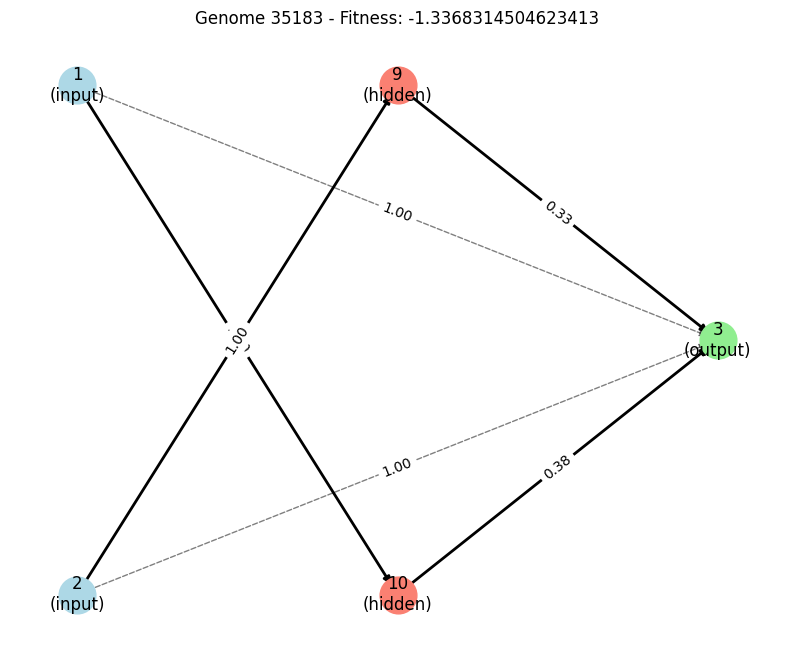

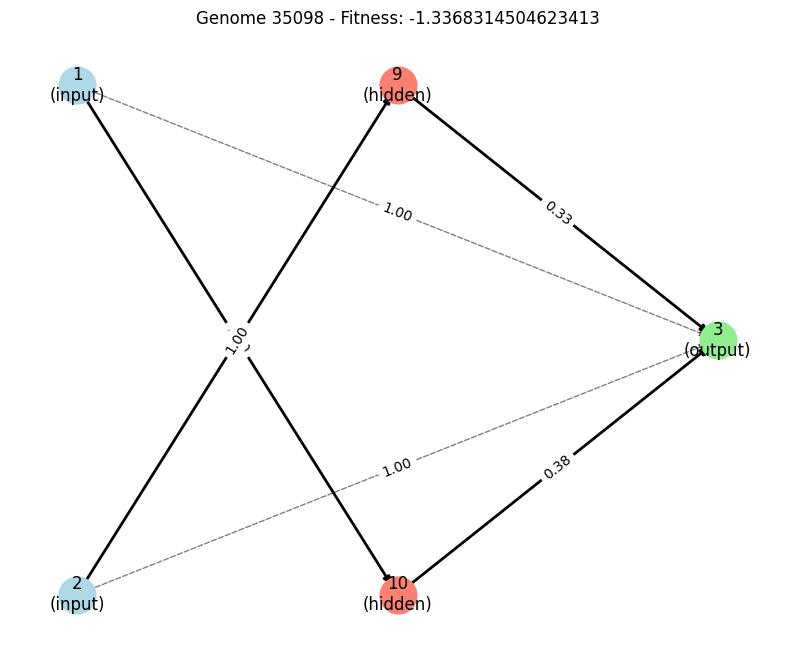

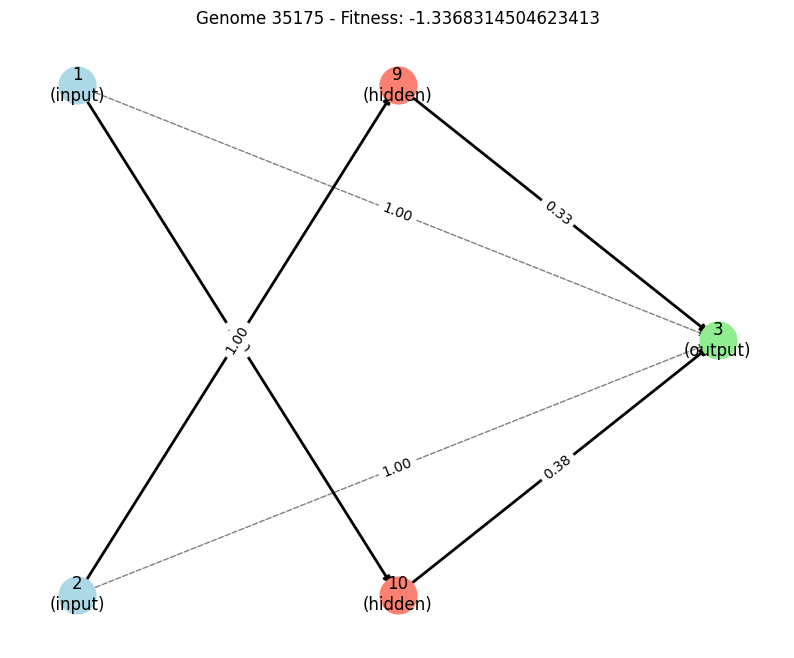

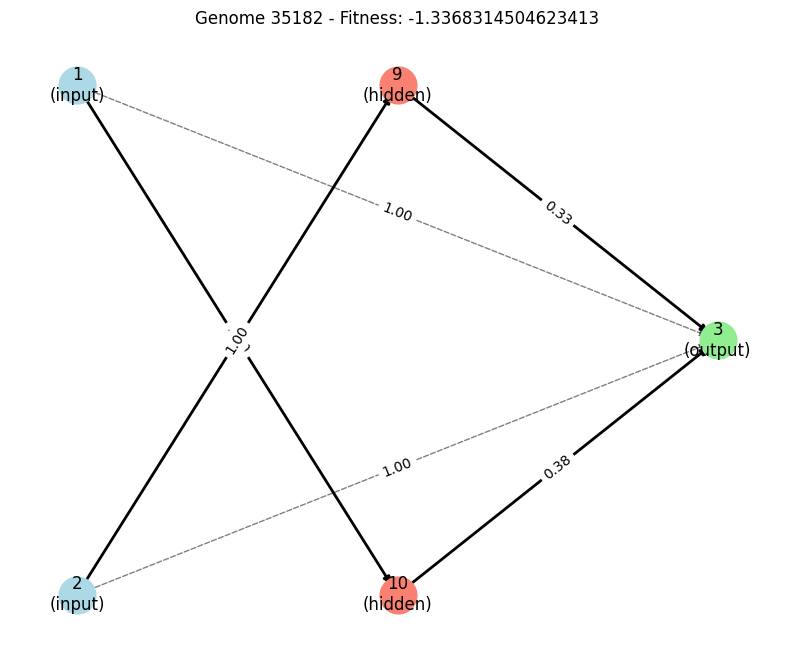

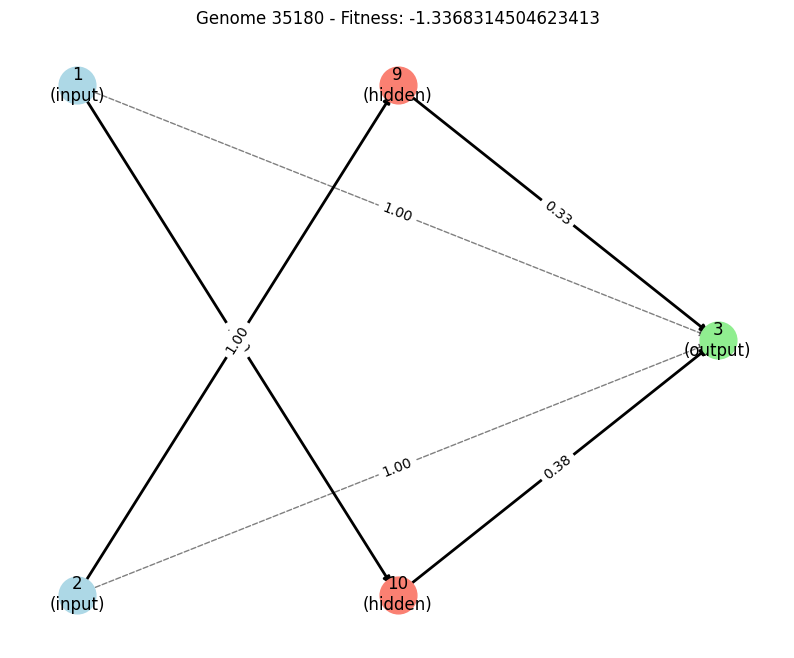

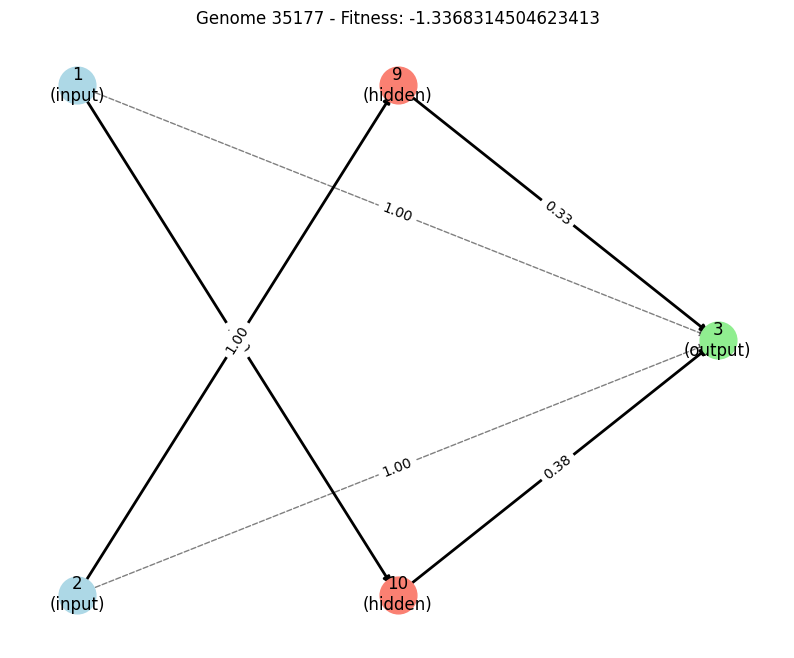

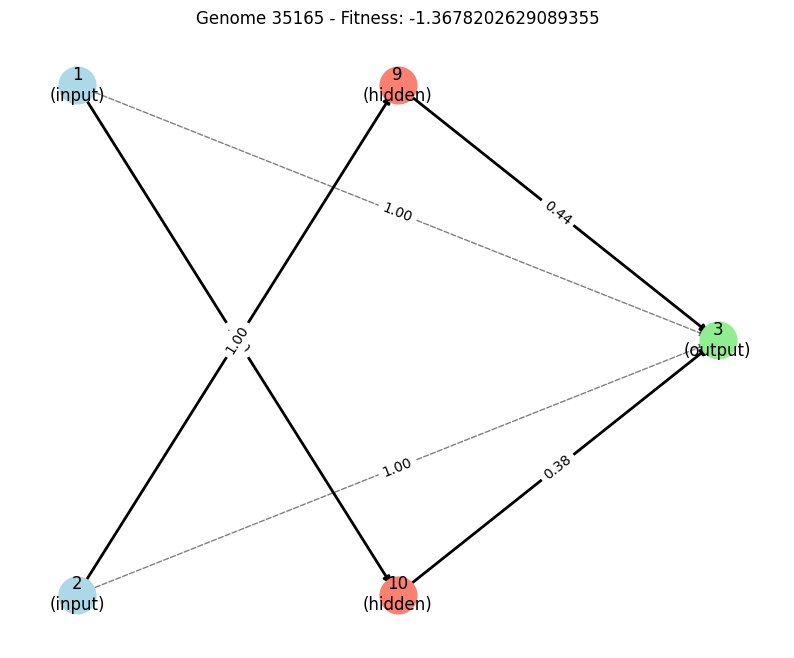

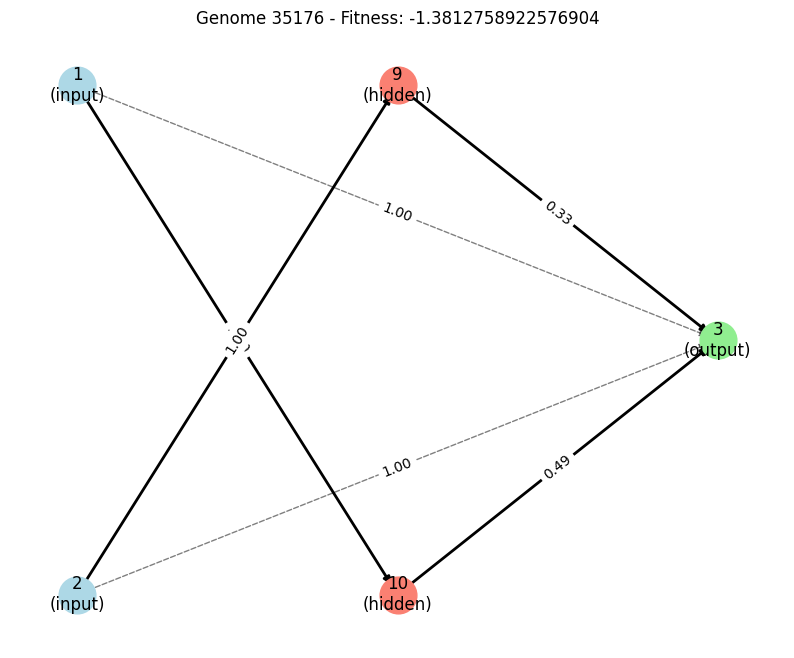

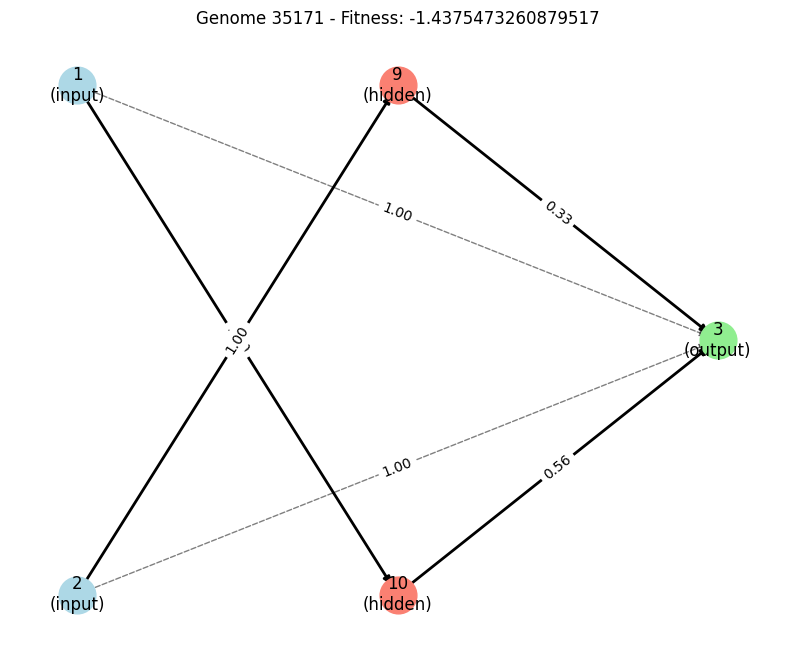

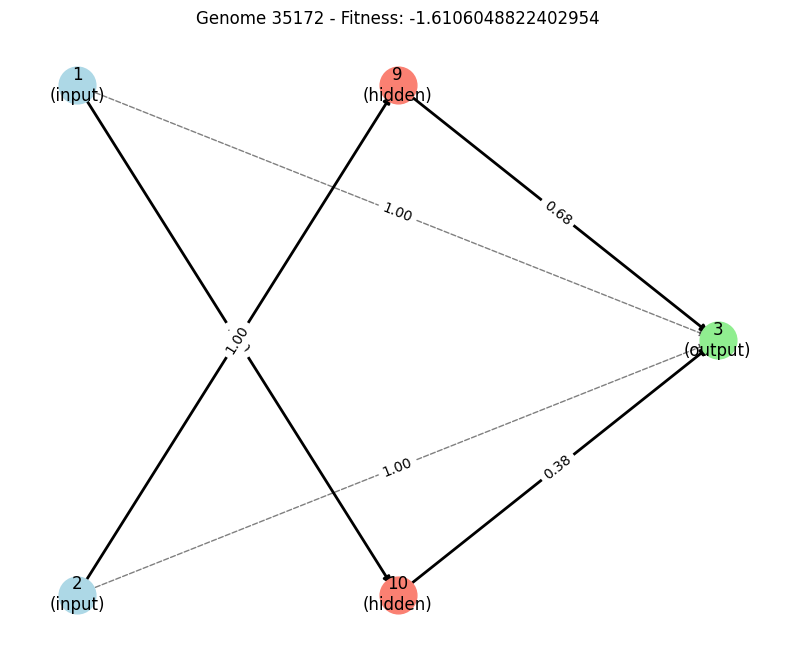

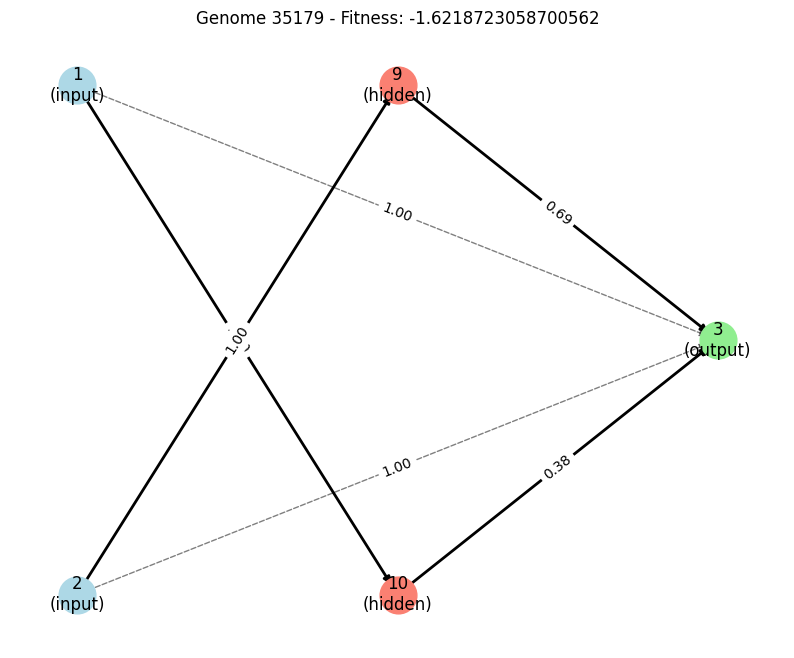

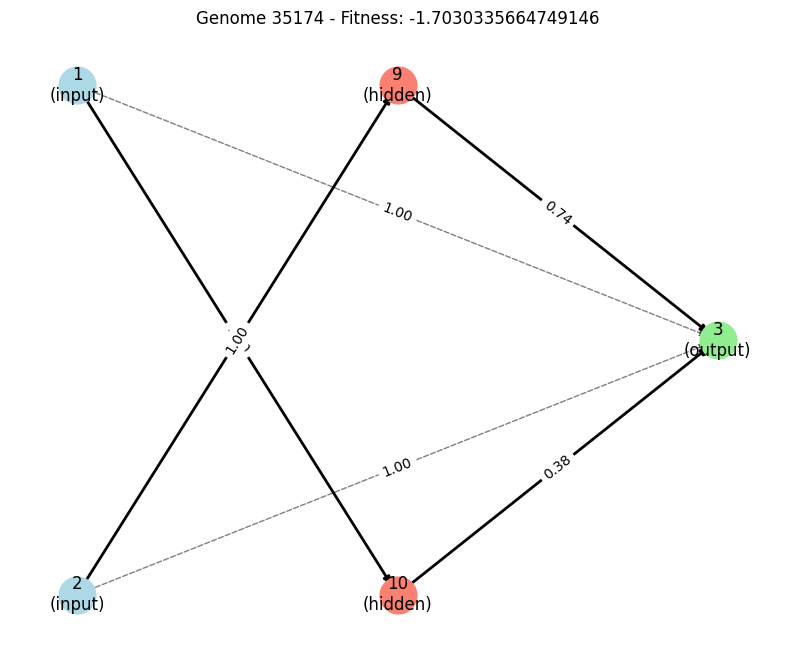

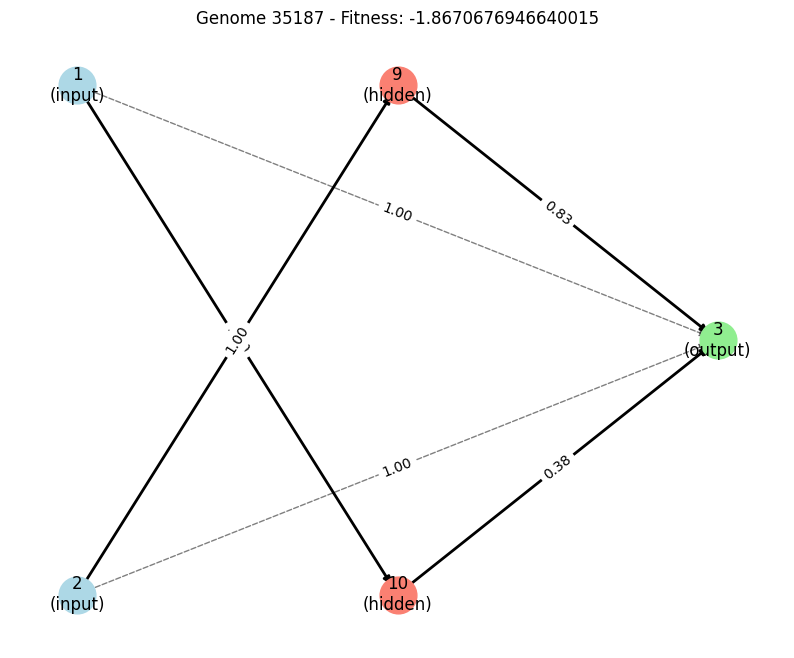

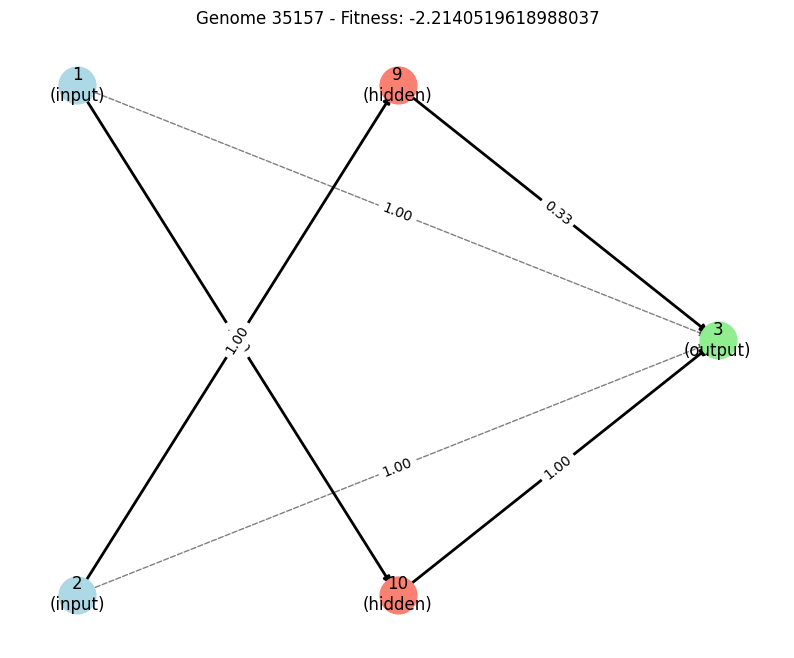

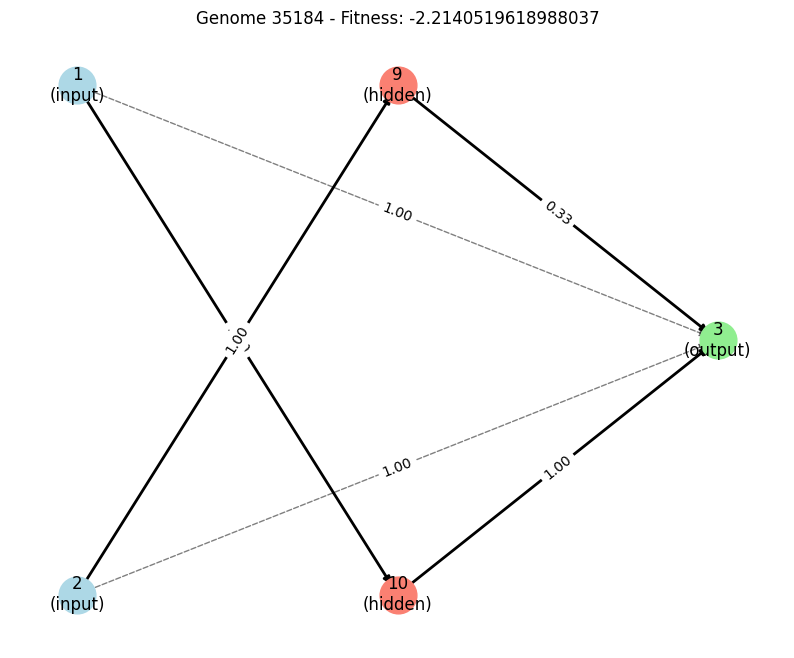

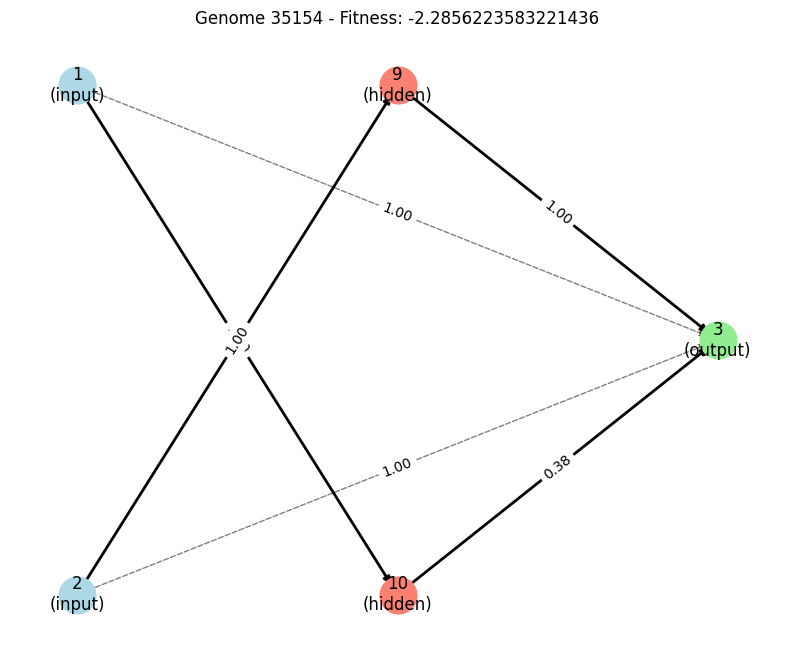

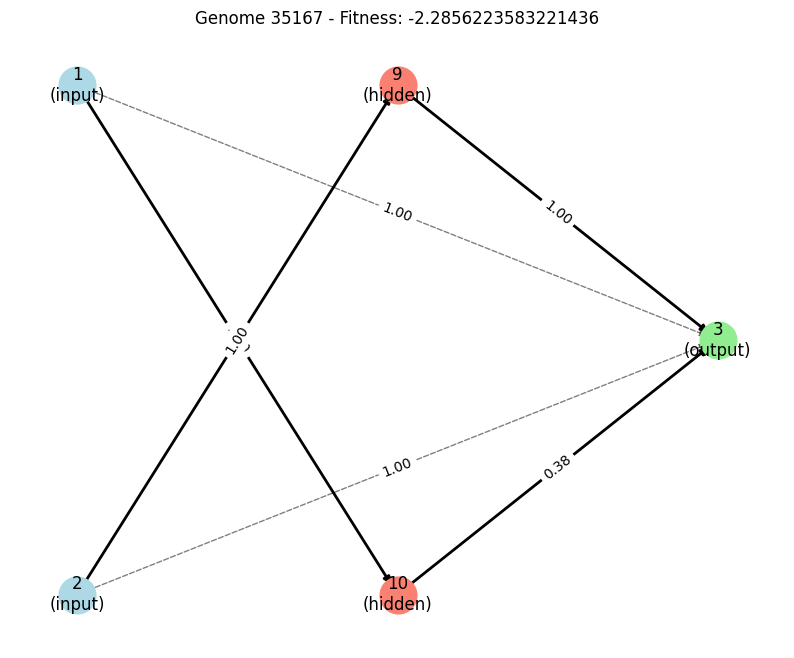

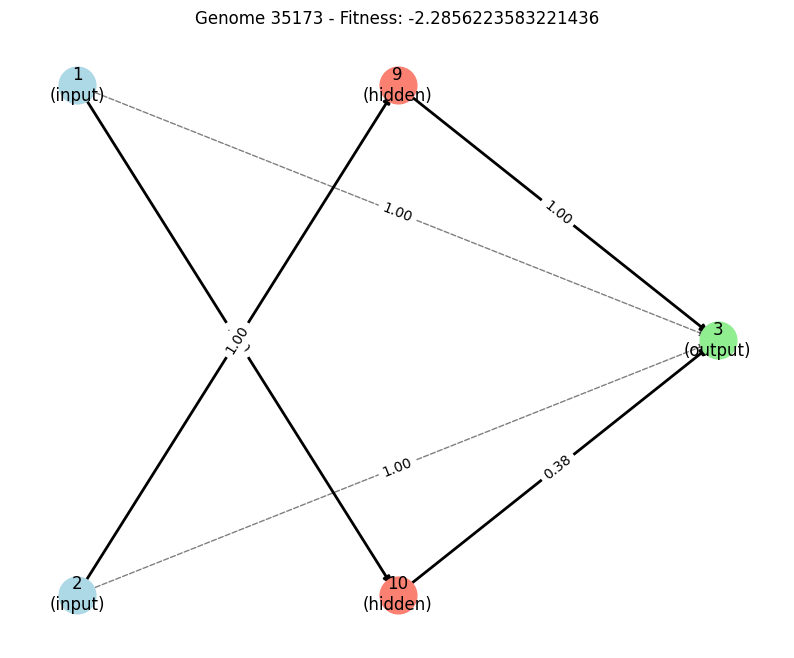

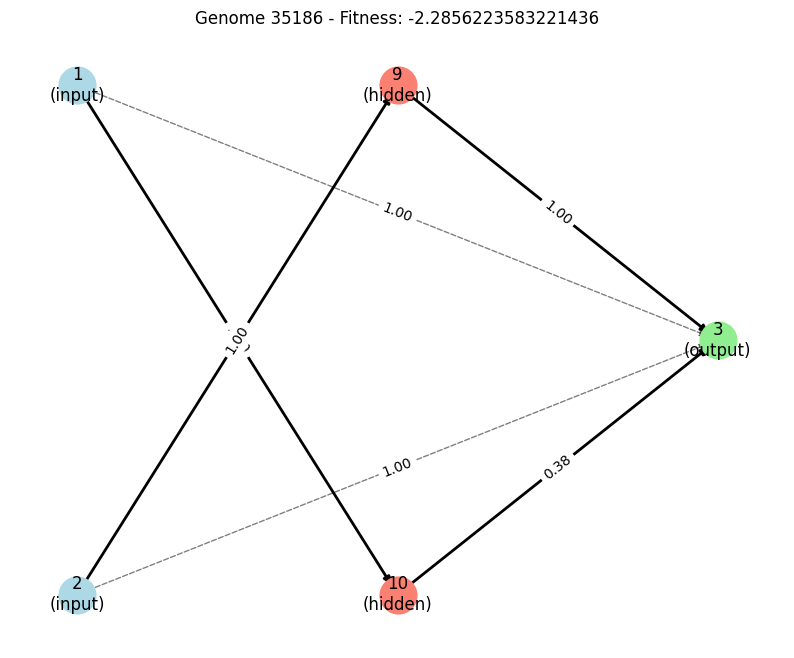

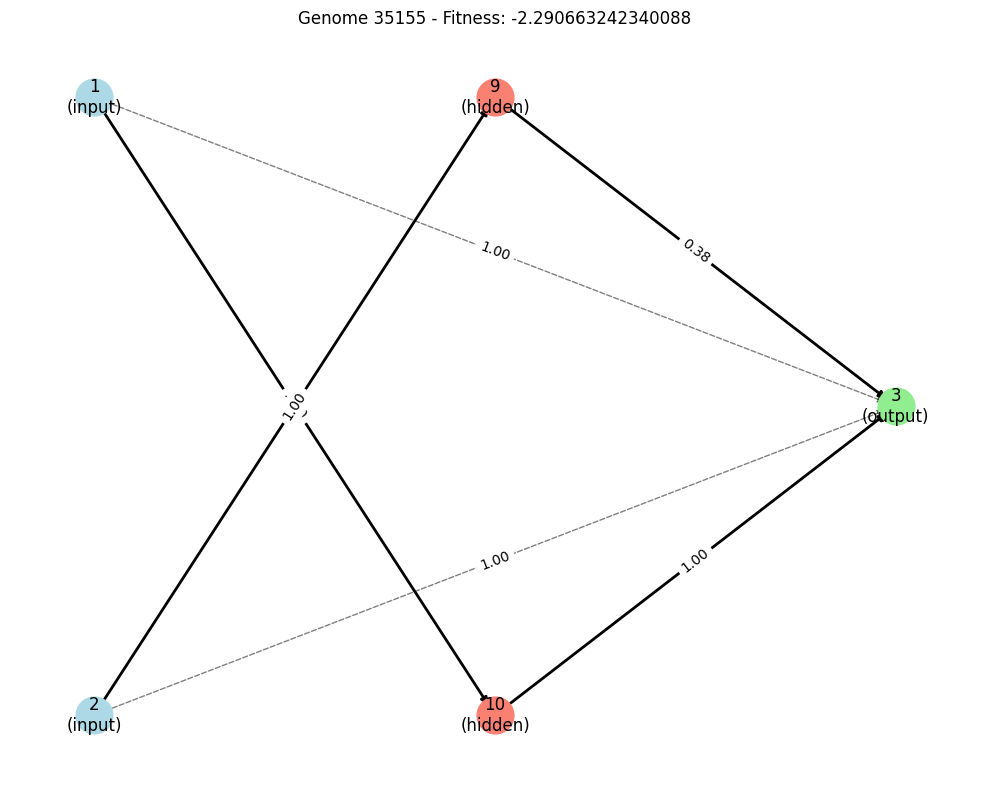

In [2]:
visualize_neural_network("../data/xor_950.json")